# Problem Statement
The file 'data_app.csv' contains the results of an experiment where customer behaviour of Smith Hotels is compared for their purchasing habits. The objective is to determine if the new launched app by the company generates more revenvue compared to the traditional offline purchasing. The customers are separated into two groups, Control & Treatment, the spending for both group is captured for one year without the app. Then the Treatment group is provided with the app and their spending is captured via the app.

# Task - 1: Data Loading and Preparation
- finding missing values
- replacing missing values appropriately

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
df = pd.read_csv(r'C:\Users\rohit\Downloads\data_app.csv')
df.head()

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,1,18,5760
1,1002,1,Female,36,1,2,5,1,6,1830
2,1003,1,Female,43,1,1,12,1,9,2682
3,1004,1,Male,47,1,1,70,1,21,6846
4,1005,1,Male,41,1,2,13,1,11,3377


In [4]:
#Checking the columns for any missing values
df.isnull().sum()

CustomerID     0
Adopt          0
Gender         0
Age            0
Nationality    0
Loyalty        0
Tenure         0
Post           0
NumBookings    0
Spending       0
dtype: int64

As we can see, there are no missing values. So we can carry on with further analysis.

In [5]:
#Providing appropriate datatypes for nationality & loyalty columns
dict1 = {1:'Bronze', 2:'Silver', 3:'Gold', 4:'Platinum'}
dict2 = {1:'US Resident', 0:'Non-US Resident'}
df['Loyalty'].replace(dict1, inplace = True)
df['Nationality'].replace(dict2, inplace = True)
df.head()

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,US Resident,Silver,57,1,18,5760
1,1002,1,Female,36,US Resident,Silver,5,1,6,1830
2,1003,1,Female,43,US Resident,Bronze,12,1,9,2682
3,1004,1,Male,47,US Resident,Bronze,70,1,21,6846
4,1005,1,Male,41,US Resident,Silver,13,1,11,3377


# Task - 2: Univariate Analysis I
##### Checking customer characteristics:
- Demographics: Gender, age, nationality
- Loyalty membership and tenure with the hotel chain (in months)

<AxesSubplot:xlabel='Age', ylabel='Count'>

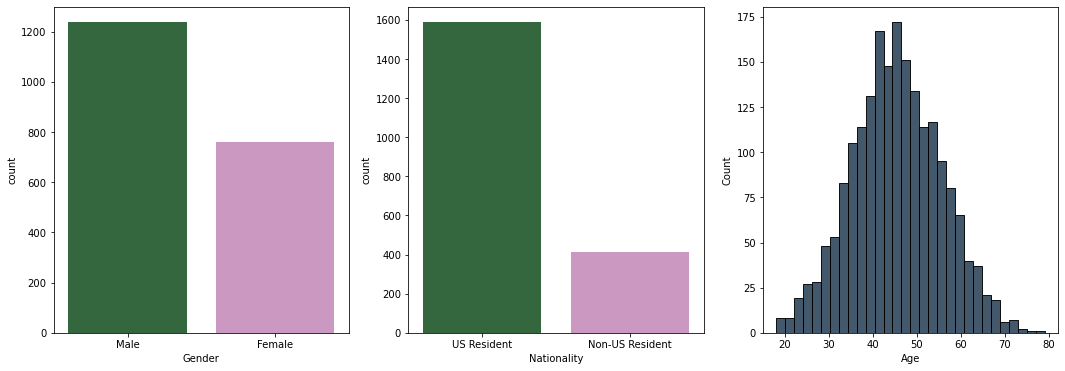

In [6]:
#filtering data set for only post period to avoid repetition of in data for same customer
df_post = df[df['Post'] == 1]

#analysing the demographics individually
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.countplot(ax = axes[0], data = df_post, x = 'Gender', palette = 'cubehelix')
sns.countplot(ax = axes[1], data = df_post, x = 'Nationality', palette = 'cubehelix')
sns.histplot(ax = axes[2], data = df_post, x = 'Age', color = '#05203B')

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

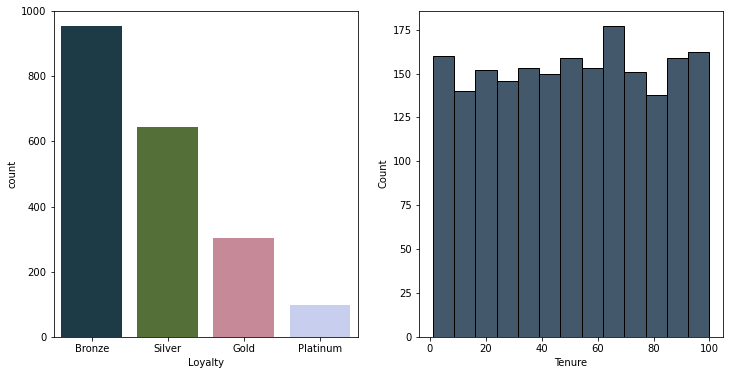

In [7]:
#analysing loyalty & tenure individually
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.countplot(ax = axes[0], data = df_post, x = 'Loyalty', order=df['Loyalty'].value_counts().index, palette = 'cubehelix')
sns.histplot(ax = axes[1], data = df_post, x = 'Tenure', color = '#05203B')

<AxesSubplot:xlabel='Gender', ylabel='count'>

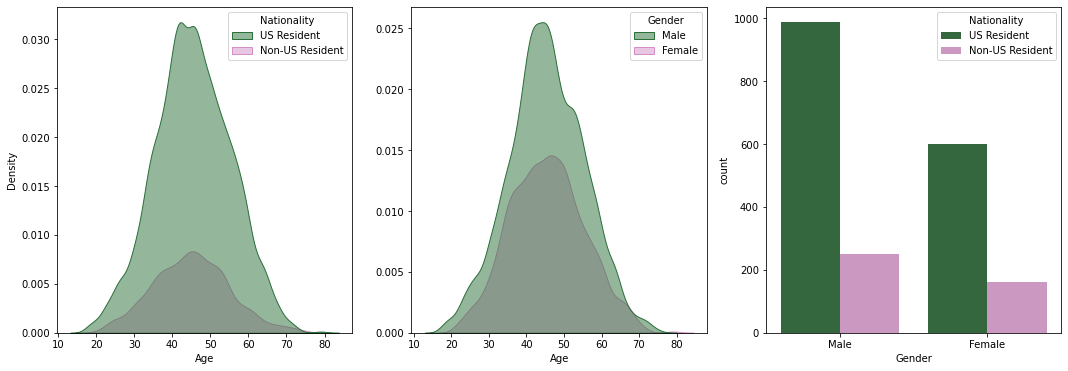

In [8]:
#bivariate analysis
#comparing demographics against each other
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.kdeplot(ax = axes[0], data = df_post, x = 'Age', hue = 'Nationality', bw_adjust = .7, fill = True, alpha = 0.5, palette = 'cubehelix')
sns.kdeplot(ax = axes[1], data = df_post, x = 'Age', hue = 'Gender', bw_adjust = .7, fill = True, alpha = 0.5, palette = 'cubehelix')
axes[1].set_ylabel('')
sns.countplot(ax = axes[2], data = df_post, x = 'Gender', hue = 'Nationality', palette = 'cubehelix')

The above compariso clearly shows the distribution of customers in the segments of naitonality, gender & age.

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

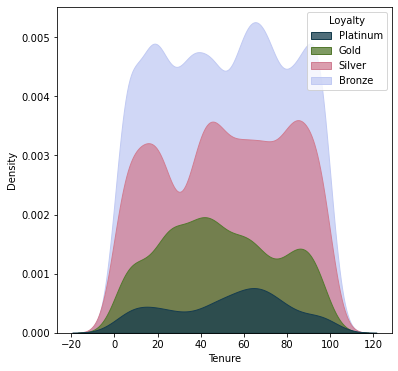

In [9]:
#comparing distribution of tenure in differnt loyalty memberships
plt.subplots(figsize = (6, 6))
sns.kdeplot(data = df_post, x = 'Tenure', hue = 'Loyalty', hue_order = ['Platinum', 'Gold', 'Silver', 'Bronze'], bw_adjust = .7, fill = True, alpha = 0.75, palette = 'cubehelix')

Above is the distribution of customers in different loyalty programs based on their tenures.

# Task - 3: Univariate Analysis II
#### Checking customer's purchasing pattern:
- Amount spent [Spending]
- Number of bookings [NumBookings]

<AxesSubplot:xlabel='Spending'>

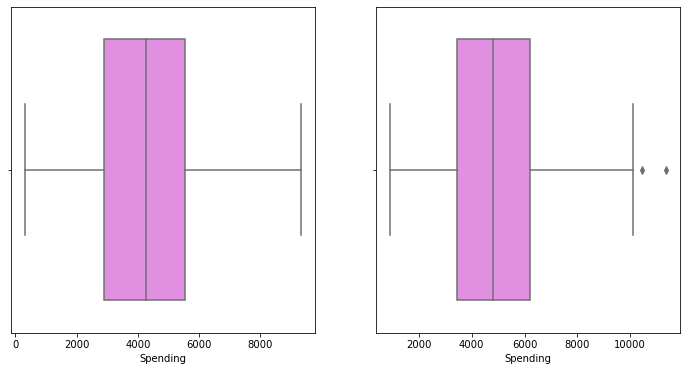

In [10]:
#filtering data for pre app adoption period
df_pre = df[df['Post'] == 0]

#analysing differnce in spending for both periods
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(ax = axes[0], data = df_pre, x = 'Spending', color = 'violet')
sns.boxplot(ax = axes[1], data = df_post, x = 'Spending', color = 'violet')

The median spending for post app adoption period seems to be increared a bit with a few outliers too on the higher side.

<AxesSubplot:xlabel='NumBookings'>

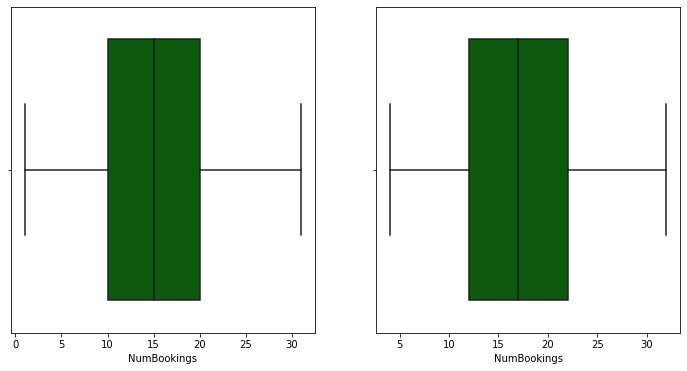

In [11]:
#analysing differnce in Number of bookings for both periods
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(ax = axes[0], data = df_pre, x = 'NumBookings', color = 'darkgreen')
sns.boxplot(ax = axes[1], data = df_post, x = 'NumBookings', color = 'darkgreen')

The median numer of bookings have also increased after the app's adotion.

In [12]:
#for converting values up to 2 decimal places
pd.options.display.float_format = "{:,.2f}".format

#getting overall stats of spending and number of bookings for before and after app's adoption
pd.concat([df_pre[['Spending', 'NumBookings']].describe(), df_post[['Spending', 'NumBookings']].describe()], axis = 1)

,Spending,NumBookings,Spending,NumBookings
count,"2,000.00","2,000.00","2,000.00","2,000.00"
mean,"4,232.17",15.19,"4,862.32",17.30
std,"1,703.97",6.02,"1,801.46",6.03
min,297.00,1.00,896.00,4.00
25%,"2,880.00",10.00,"3,443.75",12.00
50%,"4,268.50",15.00,"4,822.00",17.00
75%,"5,520.50",20.00,"6,196.25",22.00
max,"9,330.00",31.00,"11,377.00",32.00


# Task - 4: Multivariate Analysis
- Analysis for customer's characteristics and their spending behaviours
- A correlation table for all numeric values
- Construction of 95% confidence intervals for differnce in mean spending between men & women
- Conducting a hypothesis test to determine where there is difference between the mean spending
- Determining whether the difference is statistically significant

<AxesSubplot:xlabel='Age', ylabel='NumBookings'>

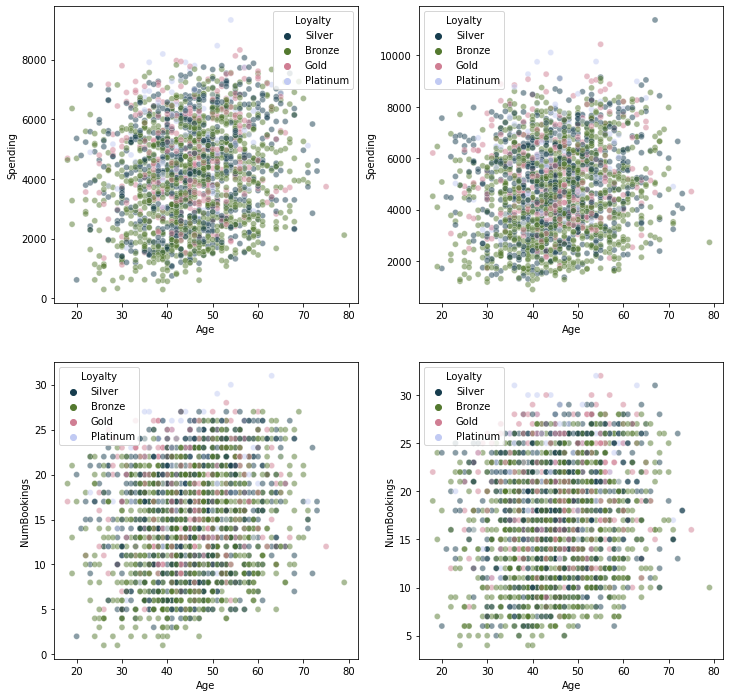

In [13]:
#analysing age & loyalty membership against spending & number of bookings for pre and post app's adoption

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

sns.scatterplot(ax = axes[0, 0], data = df_pre, x = 'Age', y = 'Spending', hue = 'Loyalty', alpha = 0.5, palette = 'cubehelix')
sns.scatterplot(ax = axes[0, 1], data = df_post, x = 'Age', y = 'Spending', hue = 'Loyalty', alpha = 0.5, palette = 'cubehelix')
sns.scatterplot(ax = axes[1, 0], data = df_pre, x = 'Age', y = 'NumBookings', hue = 'Loyalty', alpha = 0.5, palette = 'cubehelix')
sns.scatterplot(ax = axes[1, 1], data = df_post, x = 'Age', y = 'NumBookings', hue = 'Loyalty', alpha = 0.5, palette = 'cubehelix')

There's no apparent pattern in loyalty membership & age wise comparison with spending and number of bookings of the customers.

<AxesSubplot:xlabel='Gender', ylabel='NumBookings'>

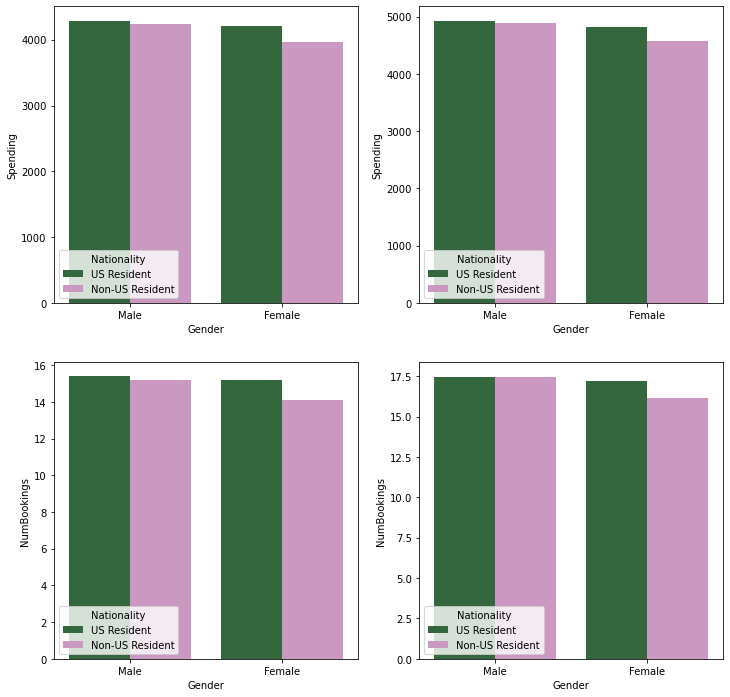

In [14]:
#analysing gender & nationality membership against spending & number of bookings for pre and post app's adoption

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

sns.barplot(ax = axes[0,0], data = df_pre, x = 'Gender', y = 'Spending', hue = 'Nationality', palette = 'cubehelix', ci = False)
sns.barplot(ax = axes[0,1], data = df_post, x = 'Gender', y = 'Spending', hue = 'Nationality', palette = 'cubehelix', ci = False)
sns.barplot(ax = axes[1,0], data = df_pre, x = 'Gender', y = 'NumBookings', hue = 'Nationality', palette = 'cubehelix', ci = False)
sns.barplot(ax = axes[1,1], data = df_post, x = 'Gender', y = 'NumBookings', hue = 'Nationality', palette = 'cubehelix', ci = False)

No significant differnce can be concluded visually.

In [15]:
#checking correlation among the numerical values
corr = df_post[['Age', 'Tenure', 'Spending', 'NumBookings']].corr()
print(corr)

              Age  Tenure  Spending  NumBookings
Age          1.00   -0.02      0.14         0.15
Tenure      -0.02    1.00      0.88         0.94
Spending     0.14    0.88      1.00         0.96
NumBookings  0.15    0.94      0.96         1.00


<AxesSubplot:>

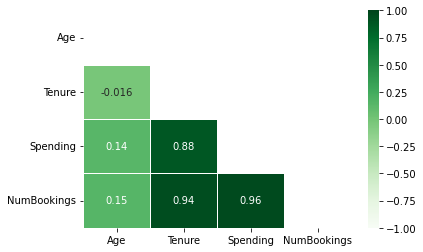

In [16]:
#plotting heatmap for the correlation
mask = np.triu(np.ones_like(corr))
sns.heatmap(data=corr, mask = mask, cmap='Greens', annot = True, linewidths=1, center=0, vmax=1, vmin=-1)

There seems to be a strong positive correlation between number of bookings, tenure and spending columns. All columns seem to have a very little correlation with age.

<AxesSubplot:xlabel='Gender', ylabel='Spending'>

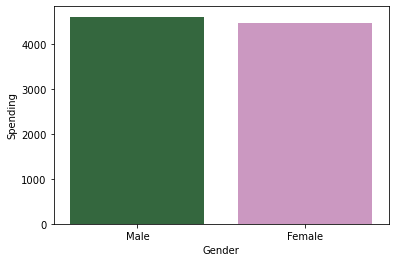

In [17]:
#spending habits of customer by their gender for overall data set
sns.barplot(data = df, x = 'Gender', y = 'Spending', ci = False,  palette = 'cubehelix')

The difference is not apparent visually. Further analysis is required for confirming.

In [18]:
#separating data frames
dfm = df.loc[df['Gender'] == 'Male', ['Spending']]
dff = df.loc[df['Gender'] == 'Female', ['Spending']]

#getting stats for male vs female spending
print(pd.concat([dfm.describe(), dff.describe()], axis=1))

       Spending  Spending
count  2,476.00  1,524.00
mean   4,600.29  4,461.07
std    1,773.64  1,790.82
min      297.00    598.00
25%    3,243.00  3,072.00
50%    4,591.00  4,384.00
75%    5,904.00  5,832.25
max   11,377.00 10,110.00


In [19]:
#checking the difference in means
dfm['Spending'].mean() - dff['Spending'].mean()

139.215029108841

#### Performing 2-sample hypothesis test for difference in means

Conducting t-tests for difference in means.
Assuming independent samples and equality of variance across populations. 

The hypotheses are as follows. 

> Let $\mu_1$ be the mean for Men's spending and $\mu_2$ the mean for Women's spending.

$$H_0: \mu_1-\mu_2 = 0$$
$$H_a: \mu_1-\mu_2 \neq 0$$

> $\alpha$ = 0.05 for two-sided test.

In [20]:
#importing required library
from scipy.stats import ttest_ind

#performing test assuming equal variance
ttest_ind(dfm, dff, equal_var = True)

Ttest_indResult(statistic=array([2.40189251]), pvalue=array([0.01635585]))

Since the p-value is less than the $\alpha$, so we can reject the null hypothesis. The difference in means for men's & women's is statistaclly significant.

In [21]:
#performing test assuming unequal variance
ttest_ind(dfm, dff, equal_var = False)

Ttest_indResult(statistic=array([2.39638778]), pvalue=array([0.01661464]))

Although there is a slight differnce in p-value, but still the conclusion is same as before.

In [22]:
#installign & importing library for CI & ttest

!pip install pingouin

import pingouin as pg


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
pg.ttest(dfm['Spending'], dff['Spending'], paired = False, alternative = 'two-sided', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.40,"3,199.53",two-sided,0.02,"[25.31, 253.12]",0.08,0.639,0.67


Test summary:

- **Test statistic**: 2.4
- **p-val**: 0.02 which is less than $\alpha$ = 0.05, indicating we can reject the null hypothesis 
- **CI95%**: [25.31, 253.12] - indicates that the difference is positive, which means we can conclude that Men's average spending is higher than Women's.

# Task - 3: Statistical Analysis

#### After-only design
- constructing of a pivot table of average Spending broken up by Adopt and Post
- difference between the treatment and control groups’ spending in the Post =1 period
- determining statistical significance of this treatment
- performing necessary hypothesis test and constructing a 95% confidence interval for the difference

In [24]:
#creating required pivot table
df_sp = pd.pivot_table(df, values=['Spending'], index=['Post', 'Adopt'], aggfunc='mean').reset_index()

df_sp

,Post,Adopt,Spending
0,0,0,"4,188.75"
1,0,1,"4,275.59"
2,1,0,"4,388.34"
3,1,1,"5,336.30"


In [25]:
#difference of spending for after-only design
x = int(df_sp.loc[(df_sp['Post'] == 1) & (df_sp['Adopt'] == 0), 'Spending'])
y = int(df_sp.loc[(df_sp['Post'] == 1) & (df_sp['Adopt'] == 1), 'Spending'])
print(x - y)

-948


In [26]:
#testing if the difference is statistically significant
pg.ttest(df[(df['Post'] == 1) & (df['Adopt'] == 0)]['Spending'], df[(df['Post'] == 1) & (df['Adopt'] == 1)]['Spending'], paired = False, alternative = 'two-sided', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-12.19,1998,two-sided,0.00,"[-1100.43, -795.5]",0.55,4.544e+29,1.00


Since p-value is less than the $\alpha$ value, we can conclude that the difference is significant.
So in conclusion, the treatment is working.

#### Before-After design
        
        
- Construct a new DataFrame, where for each customer, you have a new variable, which is the difference in spending between the Post = 1 and Post= 0 periods.

In [27]:
#using the previously created dataframes, df_pre & df_post
df_new = pd.merge(df_pre, df_post, on = 'CustomerID').drop(labels = ['Gender_y', 'Age_y', 'Nationality_y', 'Loyalty_y', 'Tenure_y'], axis = 1)
df_new['diff'] = df_new['Spending_x'] - df_new['Spending_y']
df_new.head()

,CustomerID,Adopt_x,Gender_x,Age_x,Nationality_x,Loyalty_x,Tenure_x,Post_x,NumBookings_x,Spending_x,Adopt_y,Post_y,NumBookings_y,Spending_y,diff
0,1001,1,Male,34,US Resident,Silver,57,0,14,3976,1,1,18,5760,-1784
1,1002,1,Female,36,US Resident,Silver,5,0,5,1455,1,1,6,1830,-375
2,1003,1,Female,43,US Resident,Bronze,12,0,6,1656,1,1,9,2682,-1026
3,1004,1,Male,47,US Resident,Bronze,70,0,18,5148,1,1,21,6846,-1698
4,1005,1,Male,41,US Resident,Silver,13,0,6,1782,1,1,11,3377,-1595


In [28]:
# calculating list in before-after design
diff0 = df_new.loc[df_new['Adopt_x'] == 1]['Spending_x'].mean() - df_new[df_new['Adopt_y'] == 1]['Spending_y'].mean()
diff1 = df_new.loc[df_new['Adopt_x'] == 0]['Spending_x'].mean() - df_new[df_new['Adopt_y'] == 0]['Spending_y'].mean()
lift = diff0 - diff1
print(lift)

-861.1210000000001


- Is the above treatment effect statistically significant? Similar to the previous step, perform the necessary hypothesis test and construct a 95% confidence interval for the difference in differences. Take the level of significance as 0.05

In [29]:
#using ttest method to determine statistical significance
pg.ttest(df_new['Spending_x'], df_new['Spending_y'], paired = False, alternative = 'two-sided', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-11.36,3998,two-sided,0.00,"[-738.86, -521.44]",0.36,1.156e+26,1.00


Since p-value is smaller than the significance $\alpha$, therefore we are able to conclude that the difference in the spending is significant.

In [30]:
#let's use 1 sampled test on the difference column to verify the result

from scipy.stats import ttest_1samp

ttest_1samp(df_new['diff'], popmean = 0)

Ttest_1sampResult(statistic=-36.70943951339937, pvalue=5.912559546928685e-226)

We reach to the same conclusion since the p-value is again significalty less than $\alpha$ that the treatment is working.